# Example 5: Flexural parameters mapped over the grid

We are now able to calculate the wavelet admittance and coherence functions and estimate flexural parameters at single grid cells. Now let's get maps of flexural parameters!

Perform the initial steps from the previous Example:

In [1]:
import numpy as np
import pandas as pd
from plateflex import TopoGrid, BougGrid, Project

# Read header (first line) of data set to get grid parameters
xmin, xmax, ymin, ymax, zmin, zmax, dx, dy, nx, ny = \
pd.read_csv('../data/Topo_NA.xyz', sep='\t', nrows=0).columns[1:].values.astype(float)

# Change type of nx and ny to integers
nx = int(nx); ny = int(ny)

# Read data 
topodata = pd.read_csv('../data/Topo_NA.xyz', sep='\t', \
    skiprows=1, names=['x', 'y', 'z'])['z'].values.reshape(ny,nx)[::-1]
bougdata = pd.read_csv('../data/Bouguer_NA.xyz', sep='\t', \
    skiprows=1, names=['x', 'y', 'z'])['z'].values.reshape(ny,nx)[::-1]

# Load the data as `plateflex` TopoGrid and BougGrid objects
topo = TopoGrid(topodata, dx, dy)
boug = BougGrid(bougdata, dx, dy)

# Create contours
contours = topo.make_contours(0.)

# Make mask 
mask = (topo.data < -500.)

# Define new project
project = Project(grids=[topo, boug])

# Initialize project
project.init()

# Calculate wavelet admittance and coherence
project.wlet_admit_coh()

Since the estimation of flexural parameters over the ocean with Bouguer anomaly data may be biased, let's apply the mask to the project to avoid estimating flexural parameters over those cells

In [2]:
project.mask = mask

As mentioned before, the `'L2'` approach is **MUCH** faster than the `'bayes'` approach, which allows us to calculate flexural parameters efficiently and rapidly and do this for every grid cell on the map. It is possible to perform the analysis on a decimated grid, which speeds things up further.

In [3]:
# Make sure we are using 'L2'
project.inverse = 'L2'

# Estimate flexural parameters at every 10 points of the initial grid
project.estimate_grid(10)

Computing: [##########] 34/34


Once this is done, we can look at the results by plotting the maps. By default, if you simply type `project.plot_results()`, no plot will be generated. You can plot them all at the same time using `project.plot_results(mean_Te=True, std_Te=True, mean_F=True, std_F=True, chi2=True)`, but you will have very limited control over each plot. Instead we recommend calling one plot per map and add a few keyword arguments:

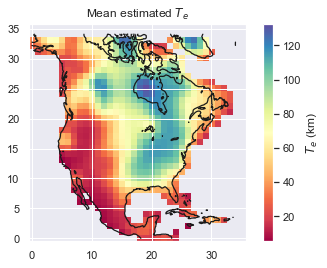

In [4]:
project.plot_results(mean_Te=True, mask=True, contours=contours, cmap='Spectral')

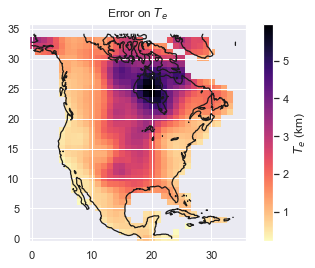

In [7]:
project.plot_results(std_Te=True, mask=True, contours=contours, cmap='magma_r')

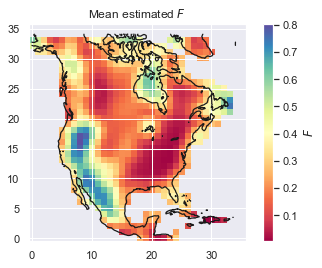

In [8]:
project.plot_results(mean_F=True, mask=True, contours=contours, cmap='Spectral')

You are now ready to map out these parameters! Check out Example 5.

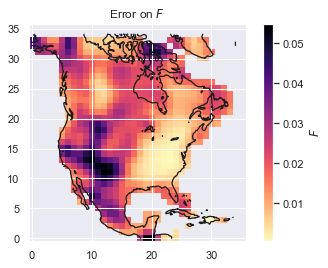

In [9]:
project.plot_results(std_F=True, mask=True, contours=contours, cmap='magma_r')

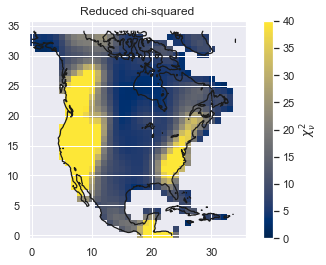

In [12]:
project.plot_results(chi2=True, mask=True, contours=contours, cmap='cividis', vmin=0, vmax=40)

Voilà! You have now estimated your first maps of effective elastic thickness (Te) and initial load ratio (F) for North America. 

<div class="alert alert-block alert-warning">
    <b>Warning:</b> In this example, we have used the default model parameters <i><b>for all grid cells</b></i>!!. You will want to use local values of `rhoc` and `zc` obtained separately to improve those estimates.
</div>

Check out Example 6 for the final analysis for North America.